# Giải bài tập

### Tiền xử lý

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [178]:
from sklearn.datasets import load_iris
df = sns.load_dataset('penguins')

In [179]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [180]:
df.columns = ['species', 'island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']
df

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [181]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [182]:
palette = {'Adelie': 'purple', 'Chinstrap': 'green', 'Gentoo': 'red'}

In [183]:
palette_sex = {'Male': 'red', 'Female': 'blue'}

In [184]:
print("So gia tri NaN của các columns: ")
df.isnull().sum()

So gia tri NaN của các columns: 


species            0
island             0
bill_length        2
bill_depth         2
flipper_length     2
body_mass          2
sex               11
dtype: int64

Những dữ liệu bị thiếu thông tin tương đối ít so với tổng thể ~5%, nên xóa đi để tránh nhiễu mô hình của ta.

In [185]:
df = df.dropna(how='any',axis=0)
df

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Khảo sát chung cho các đặc trưng

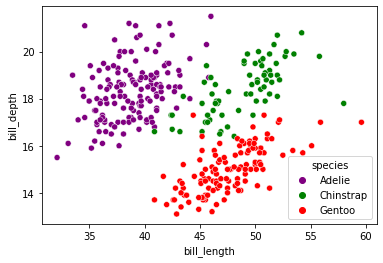

In [186]:
sns.scatterplot(data=df, x='bill_length', y='bill_depth', hue='species', palette=palette)

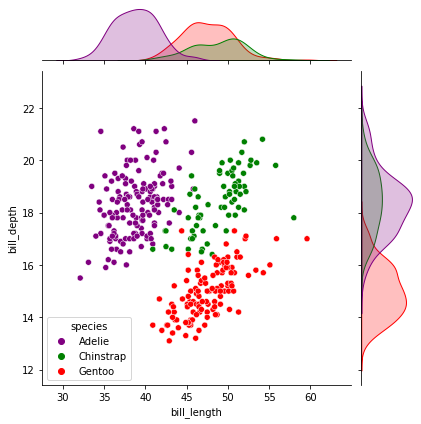

In [187]:
sns.jointplot(data=df, x='bill_length', y='bill_depth', hue='species', palette=palette)

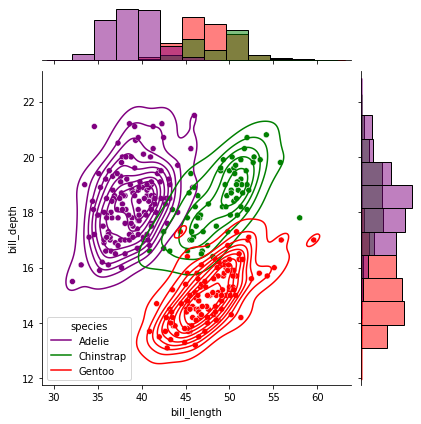

In [188]:
g = sns.jointplot(data=df, x='bill_length', y='bill_depth', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

Với 2 features bill_length và bill_depth thì thấy phân thành 3 cluster khá rõ, phân tán tương đối đều, có thể dùng chúng để train, tin chắc rằng kết quả sẽ khá tốt.

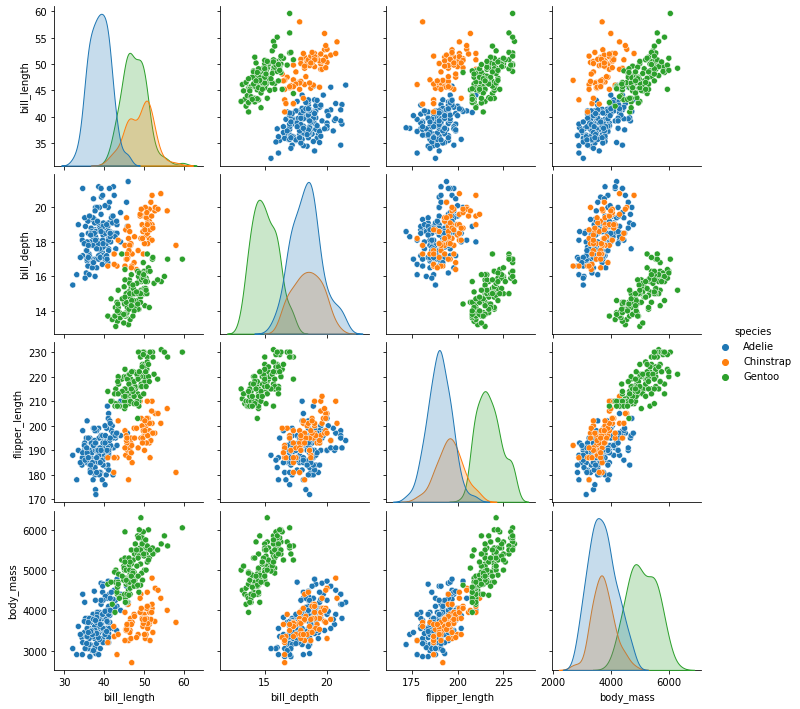

In [189]:
sns.pairplot(data=df, vars=df.columns[2: 6], hue='species')

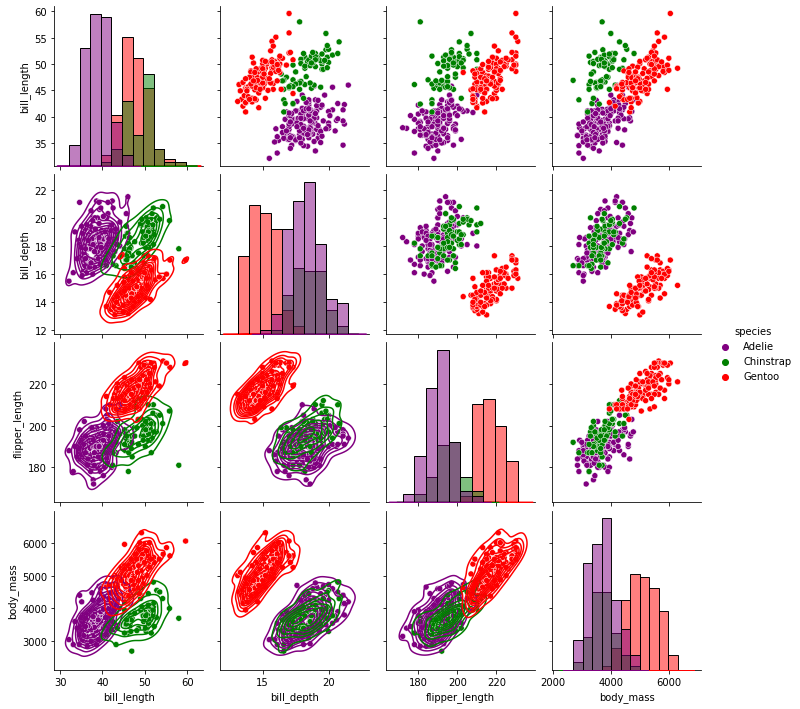

In [190]:
g = sns.pairplot(data=df, vars=df.columns[2:6], hue='species', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

Bill_length là features khá quan trọng trong mô hình, vì có có thể phân biệt rõ ràng các class với nhau

###Chuẩn bị data cho việc training

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill_length     333 non-null    float64
 3   bill_depth      333 non-null    float64
 4   flipper_length  333 non-null    float64
 5   body_mass       333 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [192]:
features = ['island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']

In [193]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [194]:
labels = np.array(['Adelie', 'Chinstrap', 'Gentoo'], dtype= '<U10')

In [195]:
X = np.array(df[features])
y = np.array(df.species)

Những data dạng string cần mã hóa thành dạng số, vì mô hình ko thế nhận data dạng string để train. Có 2 cột cần thao tác: island và sex


In [196]:
for i in range(len(X)):
  if X[i][0] == 'Torgersen':
    X[i][0] = 1
  elif X[i][0] == 'Biscoe':
    X[i][0] = 2
  elif X[i][0] == 'Dream':
    X[i][0] = 3

In [197]:
for i in range(len(X)):
  if X[i][5] == "Male":
    X[i][5] = 1
  elif X[i][5] == "Female":
    X[i][5] = 2

Phân chia data thành tập train và test

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
trainx, testx, trainy, testy = train_test_split(X, y, test_size = 0.33)

### Train mô hình

In [200]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

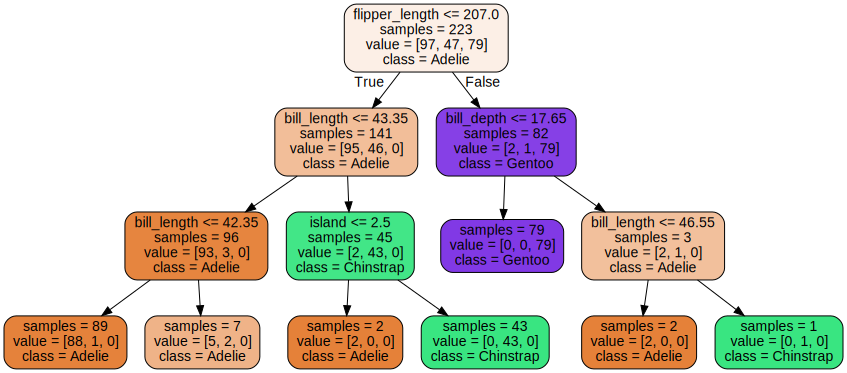

In [201]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(trainx, trainy)
export_graphviz(model, out_file='iris.dot', feature_names=features, class_names=labels, impurity=False, filled=True, rounded=True)
Source.from_file('iris.dot')

In [202]:
y_pred = model.predict(testx, check_input=True)

### Đánh giá mô hình với f1_score và accuracy_score

In [203]:
from sklearn.metrics import f1_score

print("Acc: ", (f1_score(testy, y_pred, average='macro') * 100).__round__(2), "%")

Acc:  95.06 %


In [204]:
from sklearn.metrics import accuracy_score
print("Acc: ", (accuracy_score(testy, y_pred) * 100).__round__(2), "%")

Acc:  95.45 %


### Nhận xét về max_depth

In [205]:
f1_score_evaluate = []
acc_score_evaluate = []
x = [1, 2, 3, 4, 5, 6]
for i in x:
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model.fit(trainx, trainy)

  y_pred = model.predict(testx, check_input=True)
  f1_score_evaluate.append(f1_score(testy, y_pred, average='macro'))
  acc_score_evaluate.append(accuracy_score(testy, y_pred))

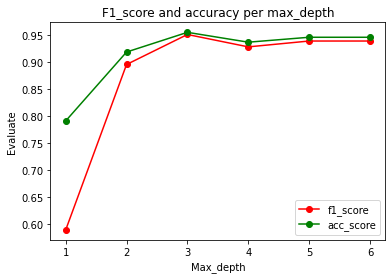

In [206]:
plt.plot(x, f1_score_evaluate, 'ro-', label = 'f1_score')
plt.plot(x, acc_score_evaluate, 'go-', label = 'acc_score')
plt.title('F1_score and accuracy per max_depth')
plt.xlabel("Max_depth")
plt.ylabel("Evaluate")
plt.legend(loc = 'best')
plt.show()

Theo mô hình này, max_deep tối đa có thể có là 6. Max_depth càng cao thì độ chính xác trên tập test càng cao